In [225]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Test 1

In [226]:
faceImage = ski.io.imread("../Server-Python/data/FaceImage.jpg")
depthImage = ski.io.imread("../Server-Python/data/DepthImage.jpg")

In [227]:
print(faceImage.shape)
print(depthImage.shape)

(480, 640, 3)
(480, 640, 3)


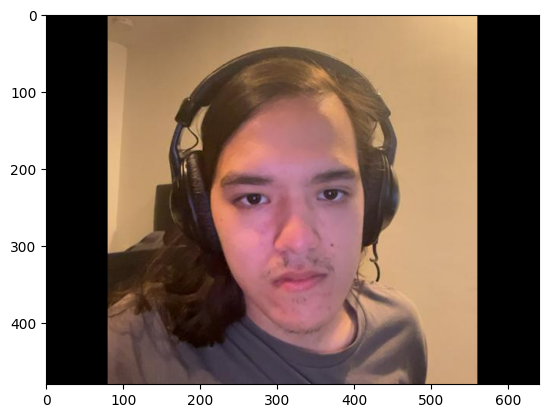

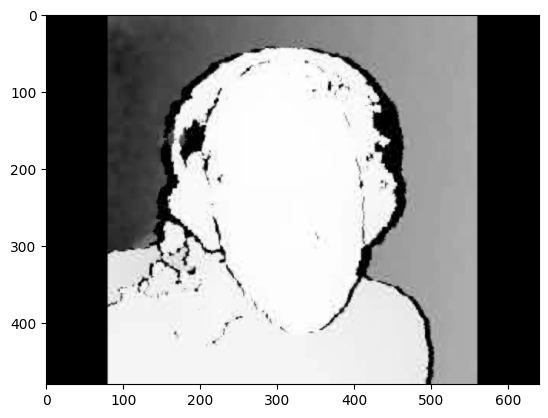

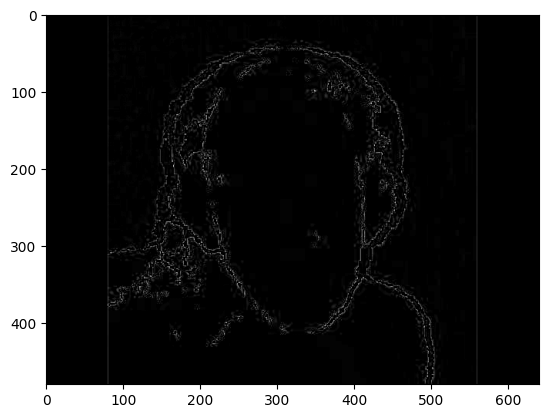

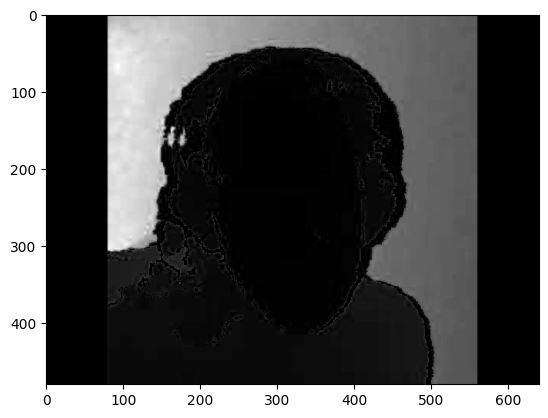

In [228]:
img1_compare = [
    faceImage,
    depthImage[:, :, 0],
    depthImage[:, :, 1],
    depthImage[:, :, 2],
]

for image in img1_compare:
    plt.imshow(image, cmap="gray")
    plt.show()

# Test 2

In [229]:
image2 = Image.open("../Server-Python/data/DepthImage.jpg")
image2_array = np.array(image2)
print(image2_array.shape)

(480, 640, 3)


In [230]:
image2.show()

In [231]:
grayscale_image = image2.convert('L')
grayscaleArray = np.array(grayscale_image)
grayscaleArray.shape

(480, 640)

In [232]:
grayscale_image.show()

# Test 3 

In [233]:
face_image3 = Image.open("../Server-Python/data/FaceImage.jpg")
depth_image3 = Image.open("../Server-Python/data/DepthImage.jpg")

In [234]:
grayscale_depth_image3 = depth_image3.convert('L')
grayscale_array_depth_image3 = np.array(grayscale_depth_image3)
grayscale_array_depth_image3.shape


(480, 640)

In [235]:
face_array_image3 = np.array(face_image3)
depth_array_image3 = grayscale_array_depth_image3

In [236]:
assert (
    face_array_image3.shape[:2] == depth_array_image3.shape
), "Las dimensiones de las imágenes no coinciden"

In [237]:
depth_map = depth_array_image3
RChannel = face_array_image3[:,:,0]
GChannel = face_array_image3[:,:,1]
BChannel = face_array_image3[:,:,2]

In [238]:
correlation_red_depth = np.corrcoef(RChannel.flatten(), depth_map.flatten())[0, 1]
correlation_green_depth = np.corrcoef(GChannel.flatten(), depth_map.flatten())[
    0, 1
]
correlation_blue_depth = np.corrcoef(BChannel.flatten(), depth_map.flatten())[0, 1]

In [239]:
# Imprimir correlaciones
print(f"Correlación entre profundidad y canal rojo: {correlation_red_depth}")
print(f"Correlación entre profundidad y canal verde: {correlation_green_depth}")
print(f"Correlación entre profundidad y canal azul: {correlation_blue_depth}")

Correlación entre profundidad y canal rojo: 0.594691644110551
Correlación entre profundidad y canal verde: 0.5369877522601629
Correlación entre profundidad y canal azul: 0.6231577980453126


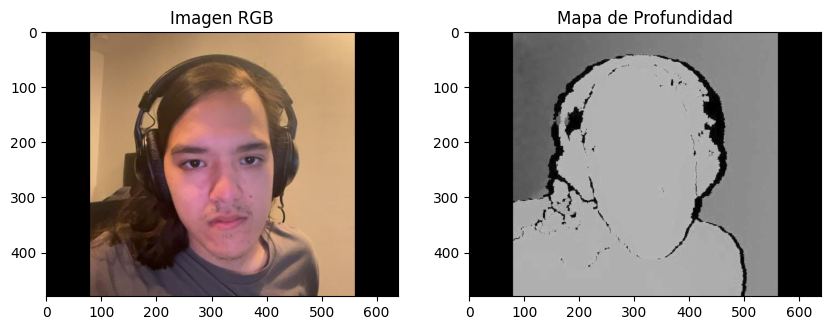

In [240]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen RGB")
plt.imshow(face_image3)

plt.subplot(1, 2, 2)
plt.title("Mapa de Profundidad")
plt.imshow(depth_map, cmap="gray")

plt.show()

In [253]:
depth_normalized = (depth_map - np.min(depth_map)) / (
    np.max(depth_map) - np.min(depth_map)
)

threshold = 0.65

In [254]:
near_mask = depth_normalized > threshold

highlighted_rgb = np.copy(face_array_image3)
highlighted_rgb[~near_mask] = [0, 0, 0]

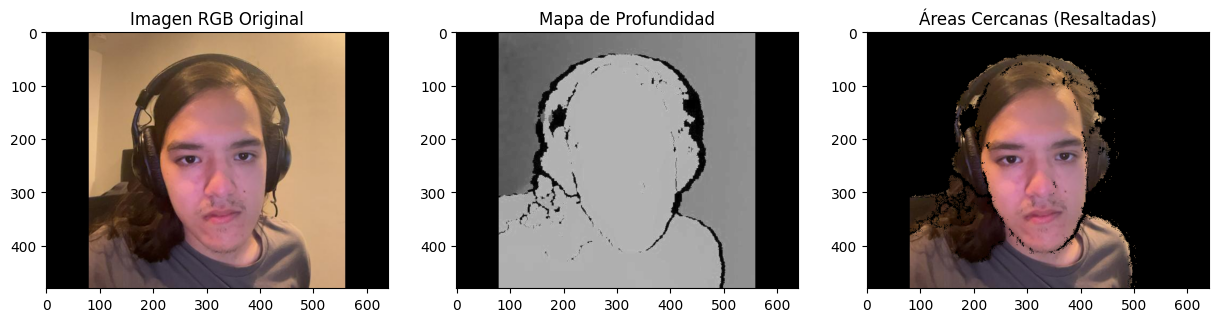

In [255]:
# Visualización de la imagen RGB original, la profundidad y las áreas cercanas
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen RGB Original")
plt.imshow(face_array_image3)

# Mapa de profundidad
plt.subplot(1, 3, 2)
plt.title("Mapa de Profundidad")
plt.imshow(depth_normalized, cmap="gray")

# Áreas cercanas resaltadas
plt.subplot(1, 3, 3)
plt.title("Áreas Cercanas (Resaltadas)")
plt.imshow(highlighted_rgb)